### STEP 1 Import Libraries and Data

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
ords_prods_customers = pd.read_pickle(r'C:\Users\PC\Documents\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_4.9.pkl')

### Crosstabs in Python

In [11]:
crosstab = pd.crosstab(ords_prods_customers['days_since_prior_order'], ords_prods_customers['order_number'], dropna = False)

### Copying the Crosstabs to view it on Excel

In [13]:
crosstab.to_clipboard()

### STEP 2 Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [22]:
ords_prods_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'Placing_orders_time', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'Spending_flag', 'mean_order_frequency', 'Frequency_flag',
       'First Name', 'Surnam', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

### The columns 'First Name', 'Surnam', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants', 'fam_status' & 'income' contain PII information.

### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions). Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [32]:
ords_prods_customers['State'].value_counts()

State
Pennsylvania            667738
California              660428
Rhode Island            657662
Georgia                 657092
New Mexico              655188
Arizona                 654553
North Carolina          652329
Oklahoma                652275
Alaska                  649026
Minnesota               648424
Massachusetts           647020
Wyoming                 644927
Virginia                642103
Missouri                641323
Texas                   641051
Colorado                639820
Maine                   639175
North Dakota            638997
Alabama                 638650
Louisiana               638179
Kansas                  638021
Delaware                637477
South Carolina          637423
Oregon                  636966
Arkansas                636737
New York                636707
Nevada                  636697
Montana                 635838
South Dakota            634362
Illinois                633476
Hawaii                  633446
Washington              633445
Mi

### Creating 'Region' Column

In [59]:
ords_prods_customers.loc[ords_prods_customers['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']),'Region'] = 'Region 1'

In [61]:
ords_prods_customers.loc[ords_prods_customers['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']),'Region'] = 'Region 2'

In [63]:
ords_prods_customers.loc[ords_prods_customers['State'].isin(['Delaware', 'Maryland', 'Virginia', 'District of Columbia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']),'Region'] = 'Region 3'

In [65]:
ords_prods_customers.loc[ords_prods_customers['State'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']),'Region'] = 'Region 4'

In [69]:
ords_prods_customers.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'Placing_orders_time', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'Spending_flag', 'mean_order_frequency', 'Frequency_flag',
       'First Name', 'Surnam', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge', 'profile', 'Region'],
      dtype='object')

### Filtering Region and Spending_flag columns

In [55]:
grouped = ords_prods_customers.groupby(['Region', 'Spending_flag']).size().reset_index(name='count')

In [57]:
print(grouped)

     Region Spending_flag     count
0  Region 1  High spender    108276
1  Region 1   Low spender   5620168
2  Region 2  High spender    156084
3  Region 2   Low spender   7447932
4  Region 3  High spender    209878
5  Region 3   Low spender  10592104
6  Region 4  High spender    160440
7  Region 4   Low spender   8140177


### The Region 3 contains the highest numbers regarding High and Low spending habits. The Region 1 shows the lowest numbers regarding High and Low spending habits.

### STEP 4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [63]:
ords_prods_customers.loc[ords_prods_merge['max_order'] < 5, 'Exclusion_flag'] = 'Low-Activity'

In [65]:
ords_prods_customers.loc[ords_prods_merge['max_order'] >= 5, 'Exclusion_flag'] = 'Regular-Activity'

In [69]:
ords_prods_customers['Exclusion_flag'].value_counts()

Exclusion_flag
Regular-Activity    30993489
Low-Activity         1441570
Name: count, dtype: int64

In [67]:
ords_prods_customers_exclusion =  ords_prods_customers[ords_prods_customers['Exclusion_flag']== 'Regular-Activity']

In [71]:
ords_prods_customers_exclusion['Exclusion_flag'].value_counts()

Exclusion_flag
Regular-Activity    30993489
Name: count, dtype: int64

### Exporting dataframe

In [73]:
ords_prods_customers_exclusion.to_pickle(r'C:\Users\PC\Documents\Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_customers_exclusion_4.10.pkl') 

### STEP 5 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [21]:
conditions = [
    (ords_prods_customers['Age'] < 30) & (ords_prods_customers['n_dependants'] == 0),  # Single Adult
    (ords_prods_customers['Age'].between(25, 40)) & (ords_prods_customers['n_dependants'] > 0),  # Young Parent
    (ords_prods_customers['Age'] > 30) & (ords_prods_customers['n_dependants'] >= 2),  # Established Family
    (ords_prods_customers['Age'] > 50) & (ords_prods_customers['n_dependants'] == 0),  # Senior Shopper
    (ords_prods_customers['income'] < 40000)  # Budget-Conscious Shopper
]

In [23]:
choices = [
    "Single Adult",
    "Young Parent",
    "Established Family",
    "Senior Shopper",
    "Budget-Conscious Shopper"
]

In [37]:
ords_prods_customers['profile'] = np.select(conditions, choices, default="High Budget Shopper")

In [39]:
ords_prods_customers.head()

,order_id,user_id,order_number,orders_day_of_week,Placing_orders_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Surnam,Gender,State,Age,date_joined,n_dependants,fam_status,income,_merge,profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Young Parent
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Young Parent
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Young Parent
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Young Parent
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Young Parent


### Filtering Profile and Spending_flag columns

In [41]:
Profile_list = ords_prods_customers.groupby(['profile', 'Spending_flag']).size().reset_index(name='count')

In [43]:
print(Profile_list)

                     profile Spending_flag     count
0   Budget-Conscious Shopper   Low spender    561393
1         Established Family  High spender    213690
2         Established Family   Low spender  10174486
3        High Budget Shopper  High spender    200978
4        High Budget Shopper   Low spender   9768511
5             Senior Shopper  High spender     75214
6             Senior Shopper   Low spender   3866532
7               Single Adult  High spender     24910
8               Single Adult   Low spender   1489838
9               Young Parent  High spender    119886
10              Young Parent   Low spender   5939621


### STEP 6 Create an appropriate visualization to show the distribution of profiles.

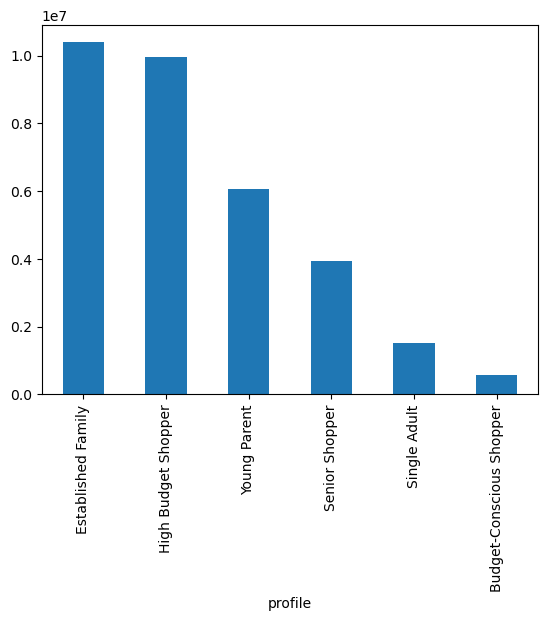

In [83]:
Profile_bar = ords_prods_customers['profile'].value_counts().plot.bar()

### Export barchart

In [86]:
Profile_bar.figure.savefig(r'C:\Users\PC\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\Profile_bar.png')

### STEP 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [49]:
profile_stats = ords_prods_customers.groupby("profile").agg({
    "days_since_prior_order": ["max", "mean", "min"],
    "prices": ["max", "mean", "min"]
})

In [51]:
print(profile_stats)

                         days_since_prior_order                 prices  \
                                            max       mean  min    max   
profile                                                                  
Budget-Conscious Shopper                   30.0  11.676433  0.0   25.0   
Established Family                         30.0  11.128061  0.0   25.0   
High Budget Shopper                        30.0  11.065180  0.0   25.0   
Senior Shopper                             30.0  10.994677  0.0   25.0   
Single Adult                               30.0  11.198876  0.0   25.0   
Young Parent                               30.0  11.122325  0.0   25.0   

                                         
                              mean  min  
profile                                  
Budget-Conscious Shopper  6.487099  1.0  
Established Family        7.792727  1.0  
High Budget Shopper       7.867926  1.0  
Senior Shopper            7.793032  1.0  
Single Adult              7.772699  1.0

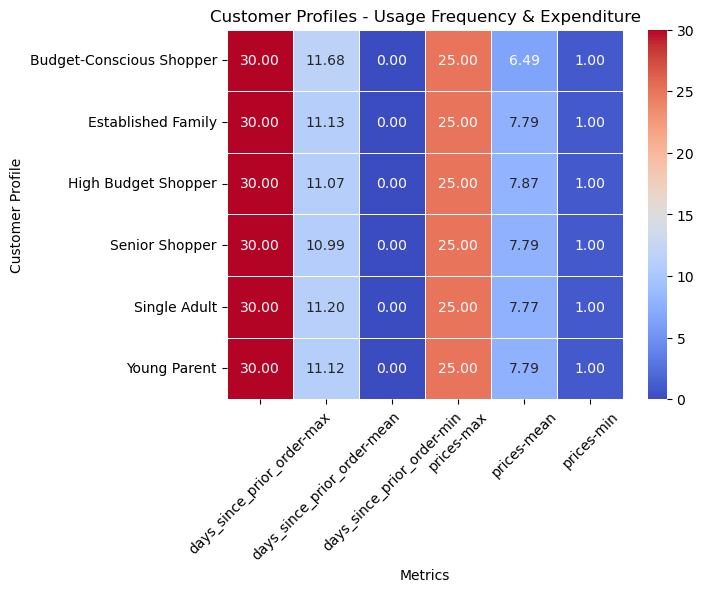

In [88]:
heatmap_profile = sns.heatmap(profile_stats, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Mejorar diseño
plt.title("Customer Profiles - Usage Frequency & Expenditure")
plt.xlabel("Metrics")
plt.ylabel("Customer Profile")
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

### Export Heatmap Profile

In [91]:
heatmap_profile.figure.savefig(r'C:\Users\PC\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\heatmap_profile.png')

### STEP 8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [71]:
region_profile_stats = ords_prods_customers.groupby(["Region", "profile"]).size().unstack()

In [73]:
print(region_profile_stats)

profile   Budget-Conscious Shopper  Established Family  High Budget Shopper  \
Region                                                                        
Region 1                    101291             1849078              1743263   
Region 2                    130006             2416873              2377635   
Region 3                    193378             3454189              3300142   
Region 4                    136718             2668036              2548449   

profile   Senior Shopper  Single Adult  Young Parent  
Region                                                
Region 1          697516        276527       1060769  
Region 2          929598        345658       1404246  
Region 3         1293784        516050       2044439  
Region 4         1020848        376513       1550053  


### Heatmap visualization

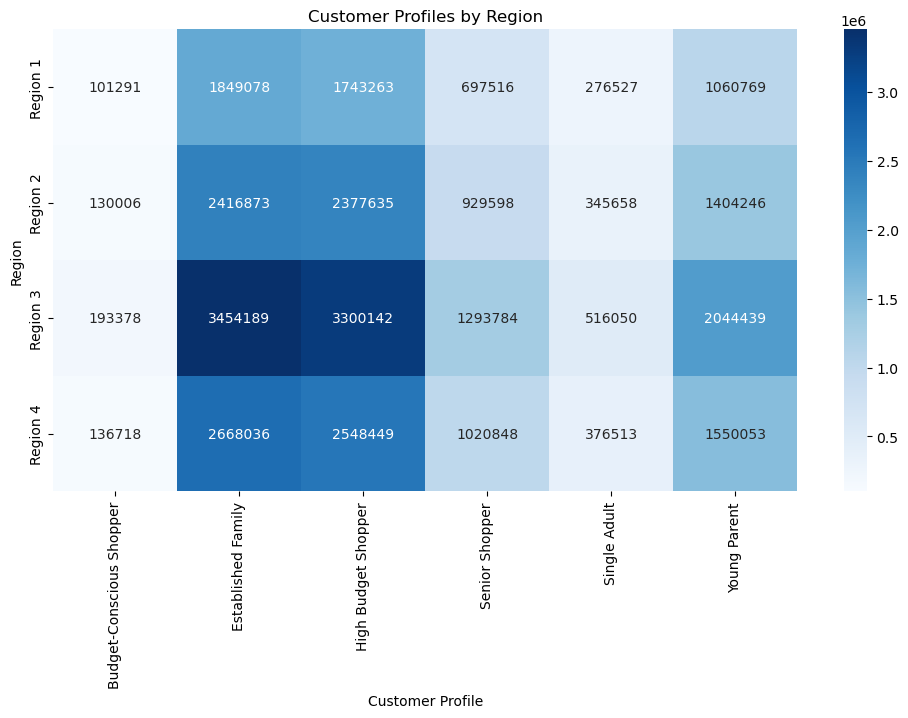

In [95]:
plt.figure(figsize=(12,6))
Heat_map_regions = sns.heatmap(region_profile_stats, cmap="Blues", annot=True, fmt="d")
plt.title("Customer Profiles by Region")
plt.xlabel("Customer Profile")
plt.ylabel("Region")
plt.show()

### Export Heatmap Regions

In [97]:
Heat_map_regions.figure.savefig(r'C:\Users\PC\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\Heat_map_regions.png')